#  Zyfra Company

- The company is from the gold mining sector
- The company develops efficiency solutions for heavy industry.
- Our task is to build a model that will predict the amount of gold recovered from gold ore.
- The model will help to optimize the production and eliminate unprofitable parameters.

## Prepare the data
### Get files

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,make_scorer
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
import pprint

In [2]:
# const random_state 
RANDOM_STATE = 12345

# Silence SettingWithCopyWarning 
pd.options.mode.chained_assignment = None


In [3]:
#Read csv file
gold_recovery_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train.csv') 
gold_recovery_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test.csv')
gold_recovery_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full.csv')

In [4]:
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [5]:
gold_recovery_train.sample(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
12319,2018-02-10 06:59:59,6.766960,8.956377,10.419626,45.574389,84.415997,9.701121,0.329199,14.924112,1.304472,...,19.963151,-499.401567,15.044839,-500.000573,10.936143,-498.844483,9.023666,-499.857996,10.988570,-499.203981
14561,2018-05-14 16:59:59,3.979700,7.824051,9.703507,48.040745,74.111496,10.285254,1.827834,11.553966,2.507282,...,30.007512,-499.849657,21.271068,-499.850307,24.977271,-500.347573,22.964348,-499.811888,24.985642,-500.253911
3955,2016-06-27 18:59:59,5.224597,6.832063,9.281311,47.763045,68.308265,8.994269,0.907413,14.305267,1.841052,...,16.962877,-501.970336,9.122809,-494.768061,17.014612,-501.032271,7.969155,-500.148567,25.018339,-500.131270
16115,2018-07-18 10:59:59,3.245268,11.720792,6.710830,45.119122,73.905355,9.935383,4.194564,7.719919,2.103984,...,18.033753,-500.134586,14.999202,-499.726698,12.061039,-500.379236,10.993713,-499.850906,12.974697,-499.486703
16499,2018-08-03 10:59:59,0.010000,0.010000,0.010000,0.010000,100.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-799.708528,0.000000,-508.673699,0.452697,-646.746867,0.507579,-765.010210,0.249089,-555.660398
3467,2016-06-07 10:59:59,3.695670,9.828998,7.082758,47.113651,43.464610,7.163246,2.410115,10.992946,3.822939,...,8.997666,-550.006516,7.048751,-525.882687,8.012975,-548.665981,6.003099,-550.337143,17.990358,-499.485199
5361,2016-08-25 08:59:59,4.493924,10.833346,8.505341,45.582788,68.631837,8.581861,2.866737,7.946325,3.312653,...,17.982493,-400.259842,9.965597,-400.050154,10.014318,-399.487596,4.974389,-399.758043,25.001851,-499.341467
7480,2017-03-23 15:59:59,5.784117,9.281290,10.111099,45.788116,64.652361,9.922437,2.963259,10.808104,3.489644,...,24.986366,-401.176319,23.049350,-399.517345,22.635869,-450.254458,17.313444,-449.930391,24.999019,-500.266699
8620,2017-05-10 03:59:59,4.630813,10.653291,7.960865,46.708742,61.065623,9.419539,3.806901,9.943330,3.732872,...,24.980436,-401.193433,22.969598,-400.540111,25.975050,-448.962379,23.991944,-449.944204,30.003965,-499.128846
2262,2016-04-18 06:00:00,4.915780,10.130897,8.652860,46.328352,62.491189,8.255269,1.871480,11.216504,2.669063,...,14.025847,-500.112557,11.996388,-500.315801,12.951255,-498.187095,11.005497,-499.333553,19.997480,-498.447146


In [6]:
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [7]:
gold_recovery_test.sample(10)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
4641,2017-11-11 09:59:59,171.419931,9.966882,7.970000,1.680076,1598.463945,-500.138548,1599.193364,-499.425692,1579.494036,...,16.996017,-500.074909,14.098323,-500.393654,15.042441,-500.475151,10.982650,-500.025399,16.004550,-499.814163
841,2016-10-06 01:59:59,192.281785,7.003405,7.700000,1.005073,1644.384679,-500.357814,1649.875082,-499.100359,1650.351093,...,14.013337,-499.789831,12.955483,-488.416423,10.453175,-512.560806,8.003336,-498.345657,20.155947,-499.273633
1379,2016-10-28 11:59:59,132.818148,6.504726,6.340000,0.693290,1654.276123,-498.523184,1704.921795,-500.449726,1701.769608,...,19.949188,-500.055910,17.002670,-499.431224,16.970301,-500.752789,13.973229,-500.620243,24.975510,-499.575043
1177,2016-10-20 01:59:59,157.256314,8.088636,6.790000,0.994326,1636.897562,-499.392765,1702.400521,-499.899560,1704.695826,...,19.986951,-499.469858,17.010733,-499.934684,19.090255,-499.411965,14.008460,-500.033609,24.965044,-320.085062
5467,2017-12-15 19:59:59,170.214932,6.465025,7.490000,1.002084,1549.288400,-500.071190,1550.444359,-799.402821,1549.711030,...,20.014300,-500.440153,15.106126,-367.486670,11.000672,-500.232732,7.997219,-500.184110,12.014253,-500.434751
2262,2016-12-04 06:59:59,223.778301,9.057398,7.350000,1.485189,1498.822693,-499.677856,1500.523474,-500.315370,1503.248618,...,18.013101,-499.455128,15.976763,-499.342415,18.148415,-499.920013,11.985572,-500.209589,21.998880,-500.995543
1614,2016-11-07 06:59:59,124.003173,8.340915,7.660000,0.911131,1599.877522,-501.005432,1601.890137,-499.511498,1599.450613,...,14.990315,-500.778609,12.940766,-500.529133,17.041113,-500.050993,13.993759,-500.125417,22.018559,-499.870485
2214,2016-12-02 06:59:59,236.220077,8.454620,7.500000,1.182624,1502.100924,-499.678438,1502.049154,-499.693601,1500.518866,...,17.988424,-498.824774,16.042722,-499.658204,16.574603,-498.126304,12.006606,-499.424393,21.998922,-498.429978
4970,2017-11-25 02:59:59,225.602545,10.496980,8.039999,2.098911,1601.832619,-499.394669,1598.236584,-501.957446,1599.615038,...,17.016245,-500.158138,15.095608,-500.270925,10.936730,-498.249510,8.964480,-500.201771,16.017255,-499.064282
2557,2016-12-16 13:59:59,177.926748,12.512900,7.010000,1.101395,1504.150507,-500.283252,1503.267630,-500.500284,1503.144824,...,16.993310,-498.884177,15.009945,-498.780453,16.799675,-500.888572,12.019177,-500.382927,21.019430,-499.151365


In [8]:
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [9]:
gold_recovery_full.sample(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
17829,2018-01-26 20:59:59,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,19.949490,-501.025374,14.993998,-500.093992,11.075805,-500.406133,9.024016,-500.027651,11.019471,-500.094101
13965,2017-08-18 20:59:59,4.021439,9.756109,8.133612,48.877255,69.919059,7.286177,2.836170,11.887242,2.351677,...,14.498046,-501.386412,10.943898,-399.950317,13.991351,-500.478365,11.020540,-500.048232,14.987294,-499.966932
15455,2017-10-19 22:59:59,6.414553,12.405646,9.635903,41.774681,73.737481,10.256645,5.060154,10.836618,4.060662,...,20.973730,-501.306121,19.015863,-400.107274,14.960624,-497.845388,10.953745,-499.923588,16.010741,-499.745657
3162,2016-05-25 17:59:59,4.626958,9.408974,9.493007,45.259928,64.848123,8.484714,2.031194,12.622647,2.861535,...,10.044600,-501.129537,7.928599,-500.514467,7.986678,-495.986861,5.969954,-499.388812,18.003524,-498.879280
7515,2016-11-23 02:59:59,6.124491,8.594139,14.284685,45.449518,75.969368,9.787152,2.318453,8.914914,2.745523,...,18.004914,-498.456145,15.967844,-492.303217,16.215464,-497.466778,12.030610,-499.680109,22.011132,-497.071688
6914,2016-10-29 01:59:59,4.260032,11.000201,13.101991,46.692386,68.058196,8.356200,2.911452,10.344911,3.428660,...,20.005142,-499.475700,17.085654,-500.362683,17.044738,-499.784850,14.002692,-499.925521,25.008867,-500.274019
20186,2018-05-05 01:59:59,3.688960,10.370795,8.102460,47.860485,64.465578,9.183818,2.938531,9.288322,2.663825,...,30.013657,-498.419302,20.061112,-497.566396,24.988277,-499.873212,23.009956,-500.151398,24.985981,-499.789679
13633,2017-08-05 00:59:59,4.355755,12.887984,5.588601,43.802880,27.912659,7.451337,5.508474,12.212043,5.919295,...,12.952985,-499.826317,9.997069,-399.603429,11.000975,-499.692727,9.022250,-499.975682,12.006083,-499.737927
6402,2016-10-07 17:59:59,5.650330,8.529979,11.154662,46.320401,69.497694,10.339104,2.482936,11.466102,3.534488,...,12.020364,-499.795220,12.037415,-500.722219,9.330848,-500.700216,7.017679,-499.704252,17.974506,-500.368264
6632,2016-10-17 07:59:59,7.338532,9.263016,12.619038,43.253396,69.172046,12.500542,3.279956,10.610922,4.479953,...,19.959097,-500.756552,14.971445,-500.241468,8.735956,-502.710102,13.980908,-501.527015,16.994387,-499.941004


### Check that recovery is calculated correctly

In [10]:
# Calculate recovery
# Avoid of dividing by 0
def recovery1(row):
    C = row['rougher.output.concentrate_au'] / row['final.output.concentrate_au'] 
    F = row['rougher.input.feed_au'] / row['rougher.output.concentrate_au'] 
    T = row['rougher.output.tail_au'] / row['secondary_cleaner.output.tail_au'] 
    
    recovery = (C *(F - T) / F *(C - T)  ) * 100
    
    return recovery

In [11]:
# Calculate recovery
# Avoid of dividing by 0
def recovery(C,F,T): 
    recovery = (C *(F - T) / (F *(C - T) or not  F *(C - T)) ) * 100
       
    return recovery

In [12]:
# Execute  recovery(rougher.output.recovery) calculation for each row
C =  'rougher.output.concentrate_au'
F = 'rougher.input.feed_au'
T = 'rougher.output.tail_au'
rougher_output_recovery_calc = gold_recovery_train.apply(lambda row:recovery(row[C],row[F],row[T]) , axis=1)
rougher_output_recovery_calc.isnull().sum()

2250

In [13]:
# Create dataFrame with recovery and calculated recovery
recovery_df = pd.DataFrame({'rougher.output.recovery':gold_recovery_train['rougher.output.recovery'],
                            'manual_calculation':rougher_output_recovery_calc})
print('Number of rows with missing recovery')
recovery_df.isnull().sum()

Number of rows with missing recovery


rougher.output.recovery    2573
manual_calculation         2250
dtype: int64

In [14]:
#Drop rows with recovery= null in order to calculate MAE
recovery_df.dropna(inplace=True)

In [15]:
mae = mean_absolute_error(recovery_df['rougher.output.recovery'], recovery_df['manual_calculation'])
print('MAE=',mae)

MAE= 9.444891926100695e-15


In [16]:
#number of observations that have the same recovery calculation
equal_recovery = recovery_df[(recovery_df['rougher.output.recovery'] == recovery_df['manual_calculation']*(-1))]['manual_calculation'].count()
print('There are {} observations that have the same recovery calculation and it equal to 0'.format(equal_recovery))
             

There are 320 observations that have the same recovery calculation and it equal to 0


reasons for MAE:
- We have a very small MAE.It can be happen because of rounding numbers in the calculation


###  Analyze the features not available in the test set

In [17]:
#get the features that does'nt exist in the test data
features_diff = np.setdiff1d(gold_recovery_train.columns, gold_recovery_test.columns)
print('There are {} featuers that does\'nt exist in the test data '.format(features_diff.size),'\n')
print(features_diff)

There are 34 featuers that does'nt exist in the test data  

['final.output.concentrate_ag' 'final.output.concentrate_au'
 'final.output.concentrate_pb' 'final.output.concentrate_sol'
 'final.output.recovery' 'final.output.tail_ag' 'final.output.tail_au'
 'final.output.tail_pb' 'final.output.tail_sol'
 'primary_cleaner.output.concentrate_ag'
 'primary_cleaner.output.concentrate_au'
 'primary_cleaner.output.concentrate_pb'
 'primary_cleaner.output.concentrate_sol' 'primary_cleaner.output.tail_ag'
 'primary_cleaner.output.tail_au' 'primary_cleaner.output.tail_pb'
 'primary_cleaner.output.tail_sol' 'rougher.calculation.au_pb_ratio'
 'rougher.calculation.floatbank10_sulfate_to_au_feed'
 'rougher.calculation.floatbank11_sulfate_to_au_feed'
 'rougher.calculation.sulfate_to_au_concentrate'
 'rougher.output.concentrate_ag' 'rougher.output.concentrate_au'
 'rougher.output.concentrate_pb' 'rougher.output.concentrate_sol'
 'rougher.output.recovery' 'rougher.output.tail_ag'
 'rougher.output.tail_a

There are 34 featuers that does'nt exist in the test data.   
these parameters are:
 - Au - gold
 - Ag - silver
 - pb - lead  
 - sol - Solder(metal alloy usually made of tin and lead which is melted using a hot iron)
 
The type of the features are:
 - output  
 - calculation
 
These columns are either produced as a result of the process or are calculated based on the results, so it is not possible to access them before the process is finished.  
Thus we can't use them for our models to avoid target leakage.

### data preprocessing

In [18]:
# Check if there are rows with the same datetime
gold_recovery_full['date'].value_counts().sort_values(ascending=False)

2017-01-08 06:59:59    1
2017-04-06 16:59:59    1
2017-04-23 04:59:59    1
2016-01-16 05:00:00    1
2018-07-05 19:59:59    1
                      ..
2016-04-08 02:00:00    1
2018-08-12 19:59:59    1
2017-10-29 09:59:59    1
2017-09-01 21:59:59    1
2016-06-23 08:59:59    1
Name: date, Length: 22716, dtype: int64

In [19]:
# Get number of observations with target = null
before_rougher_recovey_calc = gold_recovery_train[gold_recovery_train['rougher.output.recovery'].isnull()]['rougher.output.recovery'].shape[0]
before_final_recovey_calc = gold_recovery_train[gold_recovery_train['final.output.recovery'].isnull()]['final.output.recovery'].shape[0]

In [20]:
# Execute  recovery(rougher.output.recovery) calculation for each row
C =  'rougher.output.concentrate_au'
F = 'rougher.input.feed_au'
T = 'rougher.output.tail_au'
gold_recovery_train['rougher.output.recovery'] = gold_recovery_train.apply(lambda row:recovery(row[C],row[F],row[T]) , axis=1)


In [21]:
# Execute  recovery(final.output.recovery) calculation for each row
C = 'final.output.concentrate_au'
F = 'rougher.output.concentrate_au'
T = 'secondary_cleaner.output.tail_au'
gold_recovery_train['final.output.recovery'] = gold_recovery_train.apply(lambda row:recovery(row[C],row[F],row[T]) , axis=1)


In [22]:
# Get number of observations with target = null
after_rougher_recovey_calc = gold_recovery_train[gold_recovery_train['rougher.output.recovery'].isnull()]['rougher.output.recovery'].shape[0]
after_final_recovey_calc = gold_recovery_train[gold_recovery_train['final.output.recovery'].isnull()]['final.output.recovery'].shape[0]

print('we successed calculating {} rougher.output.recovery targets'.format(before_rougher_recovey_calc -after_rougher_recovey_calc ))
print('we successed calculating {} final.output.recovery targets'.format(before_final_recovey_calc -after_final_recovey_calc ))

we successed calculating 323 rougher.output.recovery targets
we successed calculating 1424 final.output.recovery targets


In [23]:
# Get number of observations with target = null 
null_final_recovery = gold_recovery_train[gold_recovery_train['final.output.recovery'].isnull()]\
                                                             ['final.output.recovery'].shape[0]
 
null_rougher_recovery = gold_recovery_train[gold_recovery_train['rougher.output.recovery'].isnull()]\
                                                             ['rougher.output.recovery'].shape[0]

print('There are {:%} observations with null targer. we will remove them'.format(null_final_recovery / gold_recovery_train.shape[0] ))

print('There are {:%} observations with null targer. we will remove them'.format(null_rougher_recovery / gold_recovery_train.shape[0] ))

There are 0.575326% observations with null targer. we will remove them
There are 13.345196% observations with null targer. we will remove them


In [24]:
# Drop all observations with a null target
gold_recovery_train = gold_recovery_train[gold_recovery_train['rougher.output.recovery'].notna()]
gold_recovery_train = gold_recovery_train[gold_recovery_train['final.output.recovery'].notna()]

In [25]:
# Fill missing values with backword and forward values
# as said in the description:'Parameters that are next to each other in terms of time are often similar'
gold_recovery_train = gold_recovery_train.ffill().bfill()
gold_recovery_test = gold_recovery_test.ffill().bfill()

In [26]:
#Get from gold_recovery_full data set  the test data set targets
#gold_recovery_test['rougher.output.recovery'] = gold_recovery_full[gold_recovery_full.date.isin(gold_recovery_test.date)]['rougher.output.recovery']
#gold_recovery_test['final.output.recovery'] = gold_recovery_full[gold_recovery_full.date.isin(gold_recovery_test.date)]['final.output.recovery']

#Remove features from the list of features difference between train set and test set
#features_diff = np.delete(features_diff,np.argwhere((features_diff =='rougher.output.recovery') | \
#                                                    (features_diff =='final.output.recovery')
#                                                   ))


In [27]:
#Get from gold_recovery_full data set  the test data set targets
gold_recovery_test = gold_recovery_test.merge(gold_recovery_full[['date','rougher.output.recovery','final.output.recovery']],
                                             how='left',on='date')

#Remove features from the list of features difference between train set and test set
features_diff = np.delete(features_diff,np.argwhere((features_diff =='rougher.output.recovery') | \
                                                    (features_diff =='final.output.recovery')
                                                   ))


In [323]:
#Convert date from object to datetime
gold_recovery_train['date'] = gold_recovery_train['date'].astype('datetime64[ns]')
gold_recovery_test['date'] = gold_recovery_test['date'].astype('datetime64[ns]')

In [324]:
#Get number of duplicated rows
gold_recovery_train.duplicated().sum()

0

In [325]:
#Get number of duplicated rows
gold_recovery_test.duplicated().sum()

0

In [326]:
#Get number of duplicated rows
gold_recovery_full.duplicated().sum()

0

###  Conclusion

- date feature type was changed from object to datetime
- The missing values were filled with the backword/forward value
- No duplicated data was found

## Analyze the data

### Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

In [327]:
concentrate_ag = gold_recovery_train[['rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']]
concentrate_au = gold_recovery_train[['rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']]
concentrate_pb = gold_recovery_train[['rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']]


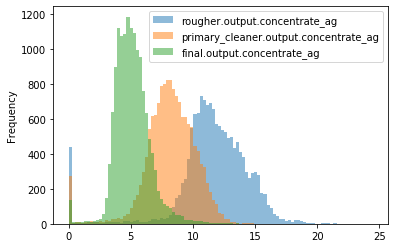

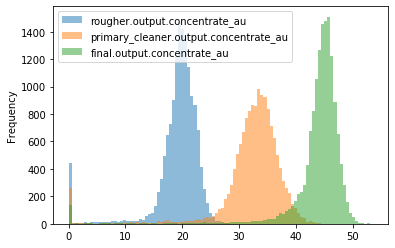

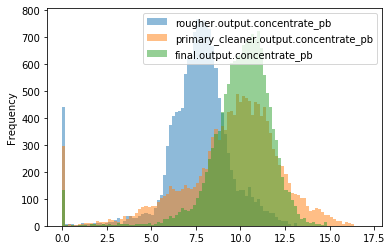

In [328]:
concentrate_ag.plot.hist(bins=100, alpha=0.5);
concentrate_au.plot.hist(bins=100, alpha=0.5);
concentrate_pb.plot.hist(bins=100, alpha=0.5);

<b> Conclusion</b>  
- Concentration of gold is getting higher in every step  
- Concentration of silver is getting lower in every step  
- Concentration of lead is not consistent after every step. it can be higher or lower  
- There are outliers around 0 value in each metal

###  Compare the feed particle size distributions in the training set and in the test set.

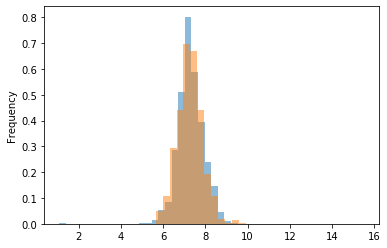

In [329]:
gold_recovery_train['primary_cleaner.input.feed_size'].plot.hist(bins=30, alpha=0.5,density=True);
gold_recovery_test['primary_cleaner.input.feed_size'].plot.hist(bins=30, alpha=0.5,density=True);


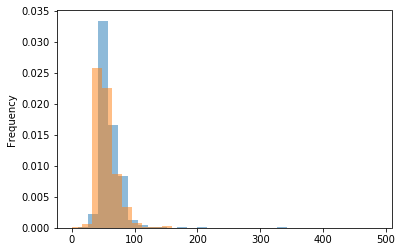

In [330]:
gold_recovery_train['rougher.input.feed_size'].plot.hist(bins=30, alpha=0.5,density=True);
gold_recovery_test['rougher.input.feed_size'].plot.hist(bins=30, alpha=0.5,density=True);

As we can see in the graphs, the feed particle size distributions in the training set and in the test set are similare 

### Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution?

In [331]:
print('Number of observations before removing outliers')
print('train:',gold_recovery_train.shape[0])
print('test:',gold_recovery_test.shape[0])

Number of observations before removing outliers
train: 14606
test: 5856


In [332]:
def remove_outliers(df,features):
    for feature in features:
        df[df[feature] < 0.01] =np.nan        
    df.dropna(inplace=True)   

In [333]:
outlires_features_train = ['rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag',
                     'rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au',
                     'rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb',
                     'final.output.recovery','rougher.output.recovery']

outlires_features_test =['final.output.recovery','rougher.output.recovery']

#Remove outlires from train
remove_outliers(gold_recovery_train,outlires_features_train)
#Remove outlires from test
remove_outliers(gold_recovery_test,outlires_features_test)

In [334]:
print('Number of observations after removing outliers')
print('train:',gold_recovery_train.shape[0])
print('test:',gold_recovery_test.shape[0])

Number of observations after removing outliers
train: 13653
test: 5154


- As we saw above in chapter 2.1, there are outliers around 0 value in each metal(ag,au.pb)

## Build the model

###  Write a function to calculate the final sMAPE value.

In [335]:
# Drop all the features that does'nt exist in test set from train set
gold_recovery_train.drop(columns=features_diff,inplace=True)
# Varify that train set and test set  has the same features 
gold_recovery_train.columns.difference(gold_recovery_test.columns)

Index([], dtype='object')

In [336]:
# List of targets
target = ['rougher.output.recovery','final.output.recovery']
# List of features not including 'date' and target
features = [feature for feature in gold_recovery_train.columns if feature != 'date' and  feature not in (target)]

In [337]:
features_train, features_test = gold_recovery_train[features].values, gold_recovery_test[features].values
target_train, target_test = gold_recovery_train[target].values, gold_recovery_test[target].values


In [338]:
def smape(target_val, predict_val):   
     return (np.abs(target_val - predict_val) / ((np.abs(target_val) + np.abs(predict_val)) / 2)).mean()   

In [339]:
def final_smape(target_val, predict_val):
    smape_rougher = smape(target_val[:,0], predict_val[:,0])
    smape_final = smape(target_val[:,1], predict_val[:,1])
    
    return 0.25 * smape_rougher + 0.75 * smape_final

### Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample.

####  LinearRegression model

In [340]:
model_lr = LinearRegression()
model_lr.fit(features_train, target_train)
predicted_test_lr = model_lr.predict(features_test)

In [341]:
# Calculate smape for 'rougher.output.recovery'
smape(target_test[:,0],predicted_test_lr[:,0])

0.048485289572423575

In [342]:
# Calculate smape for 'final.output.recovery'
smape(target_test[:,1],predicted_test_lr[:,1])


0.25584713562261346

In [343]:
#Calc final smape 
final_smape(target_test,predicted_test_lr)

0.20400667411006598

In [344]:
# Cross validation score
smape_score = make_scorer(final_smape,greater_is_better=False)
scores_lr = cross_val_score(model_lr,features_train,target_train,cv=5,scoring=smape_score)
scores_lr.mean()

-0.07559963574021689

<b>final smape using LinearRegression 0.20400667411006598</b>

####  RandomForest  model

In [345]:
# RandomForest model

# Create dictionary
result_dict={} 
# DOTO:change estimator to 120,depth to  20 for better results
for estimator in range(1,20,10):
    for depth in range(1,3,1):
        model = RandomForestRegressor(n_estimators=estimator, max_depth=depth, random_state=RANDOM_STATE)
        model.fit(features_train, target_train)
        predicted_valid = cross_val_score(model,features_train,target_train,cv=5,scoring=smape_score).mean()
        
        key = 'n_estimators={},max_depth={} '.format(estimator,depth)
        result_dict[key] =  predicted_valid
       
        
#Sort the dictionary by values       
sorted_results = sorted(result_dict.items(),key = lambda kv:(kv[1], kv[0]),reverse=True)

# Print the results in ascending order
pprint.pprint(sorted_results)

[('n_estimators=11,max_depth=1 ', -0.07368053305754121),
 ('n_estimators=11,max_depth=2 ', -0.07431014496593391),
 ('n_estimators=1,max_depth=1 ', -0.07530542184768266),
 ('n_estimators=1,max_depth=2 ', -0.07798280858266655)]


In [346]:
model_rf = RandomForestRegressor(n_estimators=41, max_depth=1, random_state=RANDOM_STATE)
model_rf.fit(features_train, target_train)
predicted_test_rf = model_rf.predict(features_test) 

In [347]:
# Calc smape for 'rougher.output.recovery'
smape(target_test[:,0],predicted_test_rf[:,0])

0.05181150126997423

In [348]:
# Calc smape for 'final.output.recovery'
smape(target_test[:,1],predicted_test_rf[:,1])

0.234139951713352

In [349]:
# Calc final smape 
final_smape(target_test ,predicted_test_rf)

0.18855783910250756

<b>final smape using RandomForest is 0.18855783910250756</b>

#### DummyRegressor model

In [350]:
# Create dictionary
result_dict={}
strategy_list=['mean', 'median', 'quantile','constant']


for strategy in strategy_list:  
    if strategy== 'constant':
         dummy_model = DummyRegressor(strategy=strategy, constant=1)
    elif strategy== 'quantile':
         dummy_model = DummyRegressor(strategy=strategy, quantile=0)
    else:
         dummy_model = DummyRegressor(strategy=strategy)
         
    predicted_test={}
    for index, target in enumerate(target_train[0]):
        dummy_model.fit(features_train, target_train[:,index])
        predicted_test[index]  = dummy_model.predict(features_test)

    #create array with targets
    # Each item(observation) contains the results from 'rougher.output.recovery' and 'final.output.recovery' 
    predicted_test_dr = []
    for index,val in enumerate(predicted_test[0]):
        predicted_test_dr.append([predicted_test[0][index],predicted_test[1][index]])
        
    #Convert list to numpy.array
    predicted_test_dr = np.array(predicted_test_dr)
   # Add item to dictionary
    result_dict[strategy] =final_smape(target_test, predicted_test_dr)

# Sort the dictionary by values       
sorted_results = sorted(result_dict.items(),key = lambda kv:(kv[1], kv[0]),reverse=False)

# Print the results in ascending order
pprint.pprint(sorted_results)


[('mean', 0.1881379539993637),
 ('median', 0.19881817408240443),
 ('constant', 1.9448284938670186),
 ('quantile', 1.975870288231067)]


The DummyRegressor model gave us the best result using mean stategy with score of  0.1881379539993637

## Conclusion

- final smape using LinearRegression 0.20400667411006598. 
- final smape using RandomForest is 0.18855783910250756.  
- final smape using DummyRegressor is 0.1881379539993637.
- There is no difference between LinearRegression and RandomForest comparing to DummyRegressor.
  that means that there is nothing that we can learn from the data.
